<a href="https://colab.research.google.com/github/AnkurMali/IST597_SP21/blob/main/IST597_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IST 597 :- Linear Regression using TF2.0
* Hands on using gradient tape

Import all necessary functions
* only include functions or library important for current script.


In [ ]:
import  os
import  tensorflow as tf
from    tensorflow import keras
import  numpy as np

# Linear Regression 
To get you to think in terms of neural architectures, we will approach the problem of estimating
good regression models from the perspective of incremental learning.  In other words, instead of
using the normal equations to directly solve for a closed-form solution, we will search for optima
(particularly minima) by iteratively calculating partial derivatives (of some cost function with respect
to parameters) and taking steps down the resultant error landscape. The ideas you will develop and
implement in this assignment will apply to learning the parameters of more complex computation
graphs, including those that define convolutional neural networks and recurrent neural net.


We create a complete example of using linear regression to predict the paramters of the function 

$$f(x) = 3 x + 2 + noise$$

Given a point $x$ we want to predict the value of $y$. We train the model on 10000 data pairs $(x,f(x))$. 

The model to learn is a linear model 

$$\hat{y} = W x + b$$

Note that, we use `tf.GradientTape` to record the gradient with respect our trainable paramters.  

We use Mean Square Error(MSE) to calcuate the loss 

$$g = (y-\hat{y})^2$$

Other loss function which can be used for eg L1
$$g = (y - \hat{y}) $$


We use Gradient Descent to update the paramters 

$$W = W - \alpha  \frac{\partial g}{\partial W}$$

$$b = b - \alpha  \frac{\partial g}{\partial b}$$

In [42]:
tf.random.set_seed(1234)
np.random.seed(1234)
#1000 data points 
NUM_EXAMPLES = 50

#define inputs and outputs with some noise 
X = tf.random.normal([NUM_EXAMPLES])  #inputs 
noise = tf.random.normal([NUM_EXAMPLES]) #noise 
noise_np = np.random.normal(0, 20, 50)
y_nonoise = X* 3 + 2
y = X * 3 + 2 + noise_np  #true output

Plot data without noise x vs y

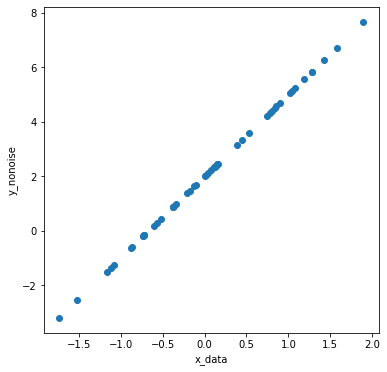

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X, y_nonoise)
plt.xlabel('x_data')
plt.ylabel('y_nonoise')
plt.show()

Plot data with noise x vs y (with noise)

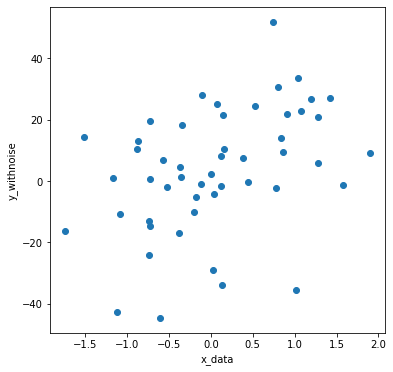

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(X, y)
plt.xlabel('x_data')
plt.ylabel('y_withnoise')
plt.show()

Distribution of noise in our data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


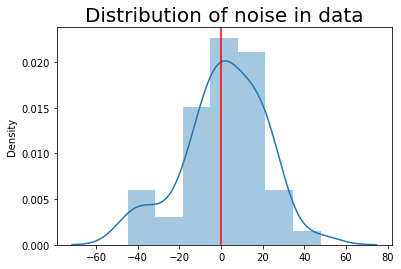

In [50]:
import seaborn as sns
plt.title('Distribution of noise in data', size=20)
sns.distplot(noise_np)
plt.axvline(0, color='r')
plt.show()

Start training

Loss at step 000: 10.291


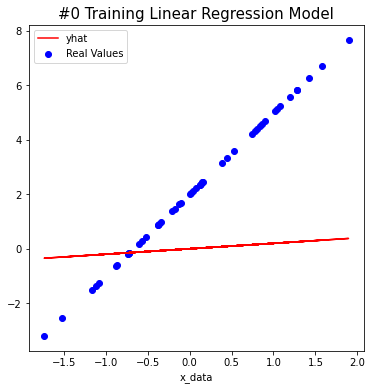



Loss at step 500: 1.791


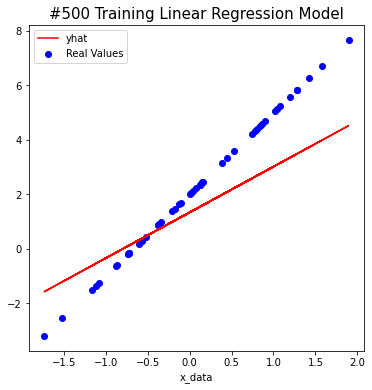



Loss at step 1000: 0.343


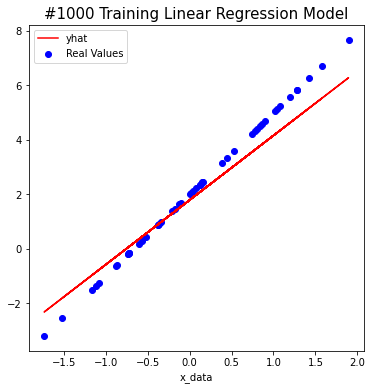



Loss at step 1500: 0.072


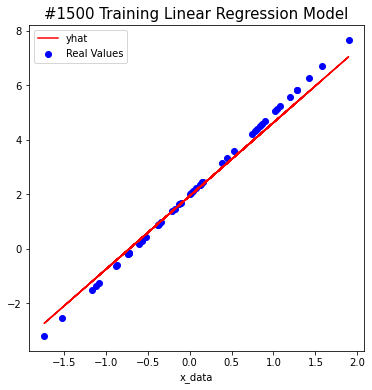



Loss at step 2000: 0.016


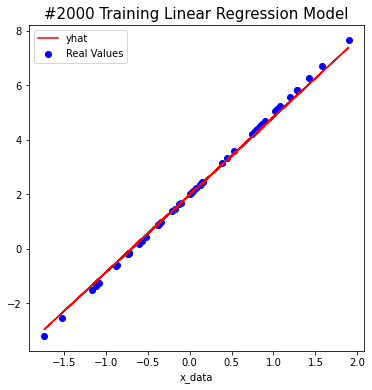



W : 2.9281466007232666 , b  = 1.9987092018127441 


In [51]:
#create model paramters with initial values 
W = tf.Variable(0.2)
b = tf.Variable(0.)
final_loss = []
#training info
train_steps = 2500
learning_rate = 0.001

for i in range(train_steps):
  
  #watch the gradient flow 
  with tf.GradientTape() as tape:
    
    #forward pass 
    yhat = X * W + b
    
    #calcuate the loss (difference squared error)
    error = yhat - y_nonoise
    loss = tf.reduce_mean(tf.square(error))
  
  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the paramters using Gradient Descent  
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)

  #Load final loss for plotting
  final_loss.append(loss.numpy())

  #print the loss every 20 iterations 
  if i % 500 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss))
    plt.figure(figsize=(6,6))
    plt.title('#%s Training Linear Regression Model' % i, size=15)
    plt.scatter(X, y_nonoise, color='blue', label='Real Values')
    plt.plot(X, yhat, color='red', label='yhat')
    plt.xlabel('x_data')
    plt.legend(loc='upper left')
    plt.show()

    print('\n')
      
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

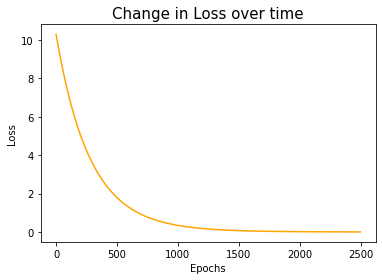

In [53]:
plt.title('Change in Loss over time', size=15)
plt.plot(final_loss, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()